In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import urllib.parse
import numpy as np
import pandas as pd
import seaborn as sns

# Описание

Этот набор данных содержит журналы сетевого трафика, собранные с Burp-Suite и предназначенные для классификации веб-запросов на хорошие или плохие в зависимости от их характеристик. Набор данных предназначен для прогнозирования того, являются ли входящие запросы законными (хорошими) или вредоносными (плохими), что помогает обнаруживать и предотвращать веб-атаки.

Признаки:

---



*   method - категориальный признак, метод запроса POST или GET
*   path - путь где произошел запрос
*   body - запрос
*   single_q - одинарные ковычки
*   double_q - двойные ковычки
*   dashes - тире
*   braces - фигурные скобки
*   spaces - пробелы
*   percentages - проценты
*   semicolons - точки с запятой
*   angle_brackets - квадратные скобки
*   special_chars - специальные символы
*   path_length - длина пути запроса
*   body_length - длинна запроса
*   badwords_count - количество слов из массива запрещенных слов
*   class - тип запроса good/bad

In [9]:
# List of bad words to check in the URL path
badwords = ['sleep', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'group by', 'admin', 'drop', 'script']

# Чтение датасета

In [10]:
data_Good_and_Bad = pd.read_csv('all_datas_f.csv')
data_Good_and_Bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          522 non-null    object
 1   path            522 non-null    object
 2   body            104 non-null    object
 3   single_q        522 non-null    int64 
 4   double_q        522 non-null    int64 
 5   dashes          522 non-null    int64 
 6   braces          522 non-null    int64 
 7   spaces          522 non-null    int64 
 8   percentages     522 non-null    int64 
 9   semicolons      522 non-null    int64 
 10  angle_brackets  522 non-null    int64 
 11  special_chars   522 non-null    int64 
 12  path_length     522 non-null    int64 
 13  body_length     522 non-null    int64 
 14  badwords_count  522 non-null    int64 
 15  class           522 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 65.4+ KB


In [11]:
data_Bad = pd.read_csv('2bad_reqff.csv')
data_Bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510 entries, 0 to 5509
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          5510 non-null   object
 1   path            5510 non-null   object
 2   body            2398 non-null   object
 3   single_q        5510 non-null   int64 
 4   double_q        5510 non-null   int64 
 5   dashes          5510 non-null   int64 
 6   braces          5510 non-null   int64 
 7   spaces          5510 non-null   int64 
 8   percentages     5510 non-null   int64 
 9   semicolons      5510 non-null   int64 
 10  angle_brackets  5510 non-null   int64 
 11  special_chars   5510 non-null   int64 
 12  path_length     5510 non-null   int64 
 13  body_length     5510 non-null   int64 
 14  badwords_count  5510 non-null   int64 
 15  class           5510 non-null   object
dtypes: int64(12), object(4)
memory usage: 688.9+ KB


In [12]:
data_Good = pd.read_csv('2good_reqff.csv')
data_Good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          287 non-null    object
 1   path            287 non-null    object
 2   body            3 non-null      object
 3   single_q        287 non-null    int64 
 4   double_q        287 non-null    int64 
 5   dashes          287 non-null    int64 
 6   braces          287 non-null    int64 
 7   spaces          287 non-null    int64 
 8   percentages     287 non-null    int64 
 9   semicolons      287 non-null    int64 
 10  angle_brackets  287 non-null    int64 
 11  special_chars   287 non-null    int64 
 12  path_length     287 non-null    int64 
 13  body_length     287 non-null    int64 
 14  badwords_count  287 non-null    int64 
 15  class           287 non-null    object
dtypes: int64(12), object(4)
memory usage: 36.0+ KB


In [13]:
data_predicted = pd.read_csv('predicted_data2.csv')
data_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          522 non-null    object
 1   path            522 non-null    object
 2   body            104 non-null    object
 3   single_q        522 non-null    int64 
 4   double_q        522 non-null    int64 
 5   dashes          522 non-null    int64 
 6   braces          522 non-null    int64 
 7   spaces          522 non-null    int64 
 8   percentages     522 non-null    int64 
 9   semicolons      522 non-null    int64 
 10  angle_brackets  522 non-null    int64 
 11  special_chars   522 non-null    int64 
 12  path_length     522 non-null    int64 
 13  body_length     522 non-null    int64 
 14  badwords_count  522 non-null    int64 
 15  class           522 non-null    int64 
 16  features        522 non-null    object
 17  prediction      522 non-null    int64 
dtypes: int64(1

In [14]:
data_Testing = pd.read_csv('Testing_data.csv')
data_Testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          116 non-null    object
 1   path            116 non-null    object
 2   body            12 non-null     object
 3   single_q        116 non-null    int64 
 4   double_q        116 non-null    int64 
 5   dashes          116 non-null    int64 
 6   braces          116 non-null    int64 
 7   spaces          116 non-null    int64 
 8   percentages     116 non-null    int64 
 9   semicolons      116 non-null    int64 
 10  angle_brackets  116 non-null    int64 
 11  special_chars   116 non-null    int64 
 12  path_length     116 non-null    int64 
 13  body_length     116 non-null    int64 
 14  badwords_count  116 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 13.7+ KB


### Вывод
Можем наблюдать большое количество пропущенных значений переваленных за 50%.

In [15]:
mising1 = data_Good_and_Bad.isna().sum()/data_Good_and_Bad.shape[0]
mising2 = data_Bad.isna().sum()/data_Bad.shape[0]
mising3 = data_Good.isna().sum()/data_Good.shape[0]
mising4 = data_predicted.isna().sum()/data_predicted.shape[0]
mising5 = data_Testing.isna().sum()/data_Testing.shape[0]
print(mising1,"\n")
print(mising2,"\n")
print(mising3,"\n")
print(mising4,"\n")
print(mising5,"\n")

method            0.000000
path              0.000000
body              0.800766
single_q          0.000000
double_q          0.000000
dashes            0.000000
braces            0.000000
spaces            0.000000
percentages       0.000000
semicolons        0.000000
angle_brackets    0.000000
special_chars     0.000000
path_length       0.000000
body_length       0.000000
badwords_count    0.000000
class             0.000000
dtype: float64 

method            0.000000
path              0.000000
body              0.564791
single_q          0.000000
double_q          0.000000
dashes            0.000000
braces            0.000000
spaces            0.000000
percentages       0.000000
semicolons        0.000000
angle_brackets    0.000000
special_chars     0.000000
path_length       0.000000
body_length       0.000000
badwords_count    0.000000
class             0.000000
dtype: float64 

method            0.000000
path              0.000000
body              0.989547
single_q          0.0

# Визуализация

In [16]:
data_Bad.head(10)

,method,path,body,single_q,double_q,dashes,braces,spaces,percentages,semicolons,angle_brackets,special_chars,path_length,body_length,badwords_count,class
0,POST,/doLogin,uid=ZAP&passw=ZAP&btnSubmit=Login,0,0,0,0,0,0,0,0,0,8,33,1,bad
1,POST,/sendFeedback,cfile=comments.txt&name=ZAP&email_addr=ZAP&sub...,0,0,0,0,7,0,0,0,0,13,124,0,bad
2,GET,/admin/clients.xls,NaN,0,0,0,0,0,0,0,0,0,18,0,1,bad
3,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,57,0,0,bad
4,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,82,0,0,bad
5,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,74,0,0,bad
6,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,83,0,0,bad
7,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,80,0,0,bad
8,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,80,0,0,bad
9,GET,/my%20documents/JohnSmith/Bank%20Site%20Docume...,NaN,0,0,0,0,3,0,0,0,0,86,0,0,bad


Найдем такие значения как среднее и разброс, вычислим корелляционную матрицу и построим некоторые графики. Но сначала проверим сбалансированность классов.

In [17]:
count_data_Good_and_Bad = data_Good_and_Bad.shape[0]
count_data_Bad = data_Bad.shape[0]
count_data_Good = data_Good.shape[0]
count_data_predicted = data_predicted.shape[0]
count_data_Testing = data_Testing.shape[0]
print(count_data_Good_and_Bad,count_data_Bad,count_data_Good,count_data_predicted,count_data_Testing)
count_all = count_data_Good_and_Bad+count_data_Bad+count_data_Good+count_data_predicted

522 5510 287 522 116


In [18]:
res_data_Good_and_Bad = data_Good_and_Bad["class"].value_counts()
res_data_Good_and_Bad = res_data_Good_and_Bad / count_data_Good_and_Bad
res_data_Good_and_Bad

,count
class,
0,0.549808
1,0.450192


In [19]:
res_data_Bad = data_Bad["class"].value_counts()
res_data_Bad = res_data_Bad / count_data_Bad
res_data_Bad

,count
class,
bad,1.0


In [20]:
res_data_Good = data_Good["class"].value_counts()
res_data_Good = res_data_Good / count_data_Good
res_data_Good

,count
class,
good,1.0


In [21]:
res_data_predicted = data_predicted["class"].value_counts()
res_data_predicted = res_data_predicted / count_data_predicted
res_data_predicted

,count
class,
0,0.549808
1,0.450192


In [22]:
res_data_predicted = data_predicted["prediction"].value_counts()
res_data_predicted = res_data_predicted / count_data_predicted
res_data_predicted

,count
prediction,
0,0.614943
1,0.385057


In [23]:
#Посчитаем общее соотношение для всех файлов
rg = 287+235*2
rb = 5510+287*2
print(f"class\nbad:{rb/count_all}\ngood:{rg/count_all}")

class
bad:0.8893436632071334
good:0.11065633679286654


### Вывод
Видно, что классы несбалансированы. Это значит что плохих запросов в датасете представленно больше.

### Среднее

In [24]:
datanew = data_Good_and_Bad.drop(["method","path","body","class"],axis = 1)
mid_Good_and_Bad = datanew.mean()
mid_Good_and_Bad

,0
single_q,0.704981
double_q,0.729885
dashes,0.111111
braces,0.446360
spaces,2.865900
percentages,0.000000
semicolons,0.224138
angle_brackets,0.239464
special_chars,0.000000
path_length,50.394636


### Стандартное отклонение

In [25]:
std_Good_and_Bad = datanew.std()
std_Good_and_Bad

,0
single_q,1.440148
double_q,1.623315
dashes,0.314571
braces,0.850650
spaces,5.349335
percentages,0.000000
semicolons,0.704763
angle_brackets,0.915915
special_chars,0.000000
path_length,50.663026


###Матрица корреляции

In [26]:
columns = ['single_q', 'double_q', 'dashes', 'braces','spaces', 'percentages', 'semicolons','angle_brackets', 'special_chars', 'path_length',"body_length","badwords_count"]
data_Bad[columns].corr(method='spearman')

,single_q,double_q,dashes,braces,spaces,percentages,semicolons,angle_brackets,special_chars,path_length,body_length,badwords_count
single_q,1.000000,0.169579,0.364258,0.431182,0.427665,NaN,0.208399,0.241353,NaN,0.164350,0.105570,0.480648
double_q,0.169579,1.000000,0.202402,0.370448,0.262562,NaN,0.216936,0.333473,NaN,0.139463,0.083890,0.284328
dashes,0.364258,0.202402,1.000000,0.135467,0.442884,NaN,-0.057709,0.166451,NaN,0.049821,0.065360,0.441883
braces,0.431182,0.370448,0.135467,1.000000,0.413577,NaN,0.148088,0.309964,NaN,0.216792,0.129578,0.432155
spaces,0.427665,0.262562,0.442884,0.413577,1.000000,NaN,0.077754,0.130365,NaN,0.076603,0.494641,0.398541
percentages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
semicolons,0.208399,0.216936,-0.057709,0.148088,0.077754,NaN,1.000000,0.142008,NaN,0.089905,0.075205,0.040957
angle_brackets,0.241353,0.333473,0.166451,0.309964,0.130365,NaN,0.142008,1.000000,NaN,0.102916,0.044596,0.071155
special_chars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
path_length,0.164350,0.139463,0.049821,0.216792,0.076603,NaN,0.089905,0.102916,NaN,1.000000,-0.636703,-0.058134


<Axes: >

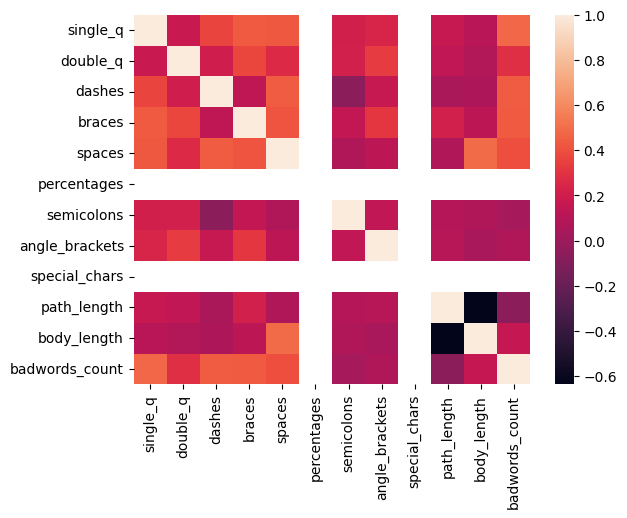

In [27]:
sns.heatmap(data_Bad[columns].corr(method='spearman'))#['pearson', 'kendall', 'spearman']

<Axes: >

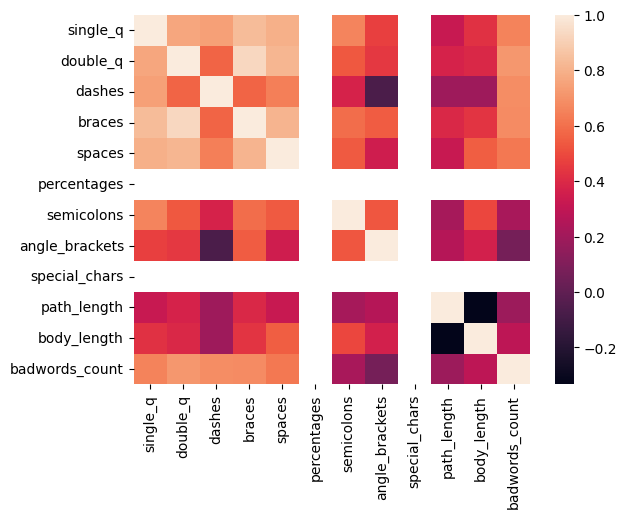

In [28]:
sns.heatmap(data_Good_and_Bad[columns].corr(method='spearman'))#['pearson', 'kendall', 'spearman']

### Вывод

Можем наблюдать отсутствие коррелированности с такими признаками как percentages и special_chars, так как их дисперсия составляет 0.

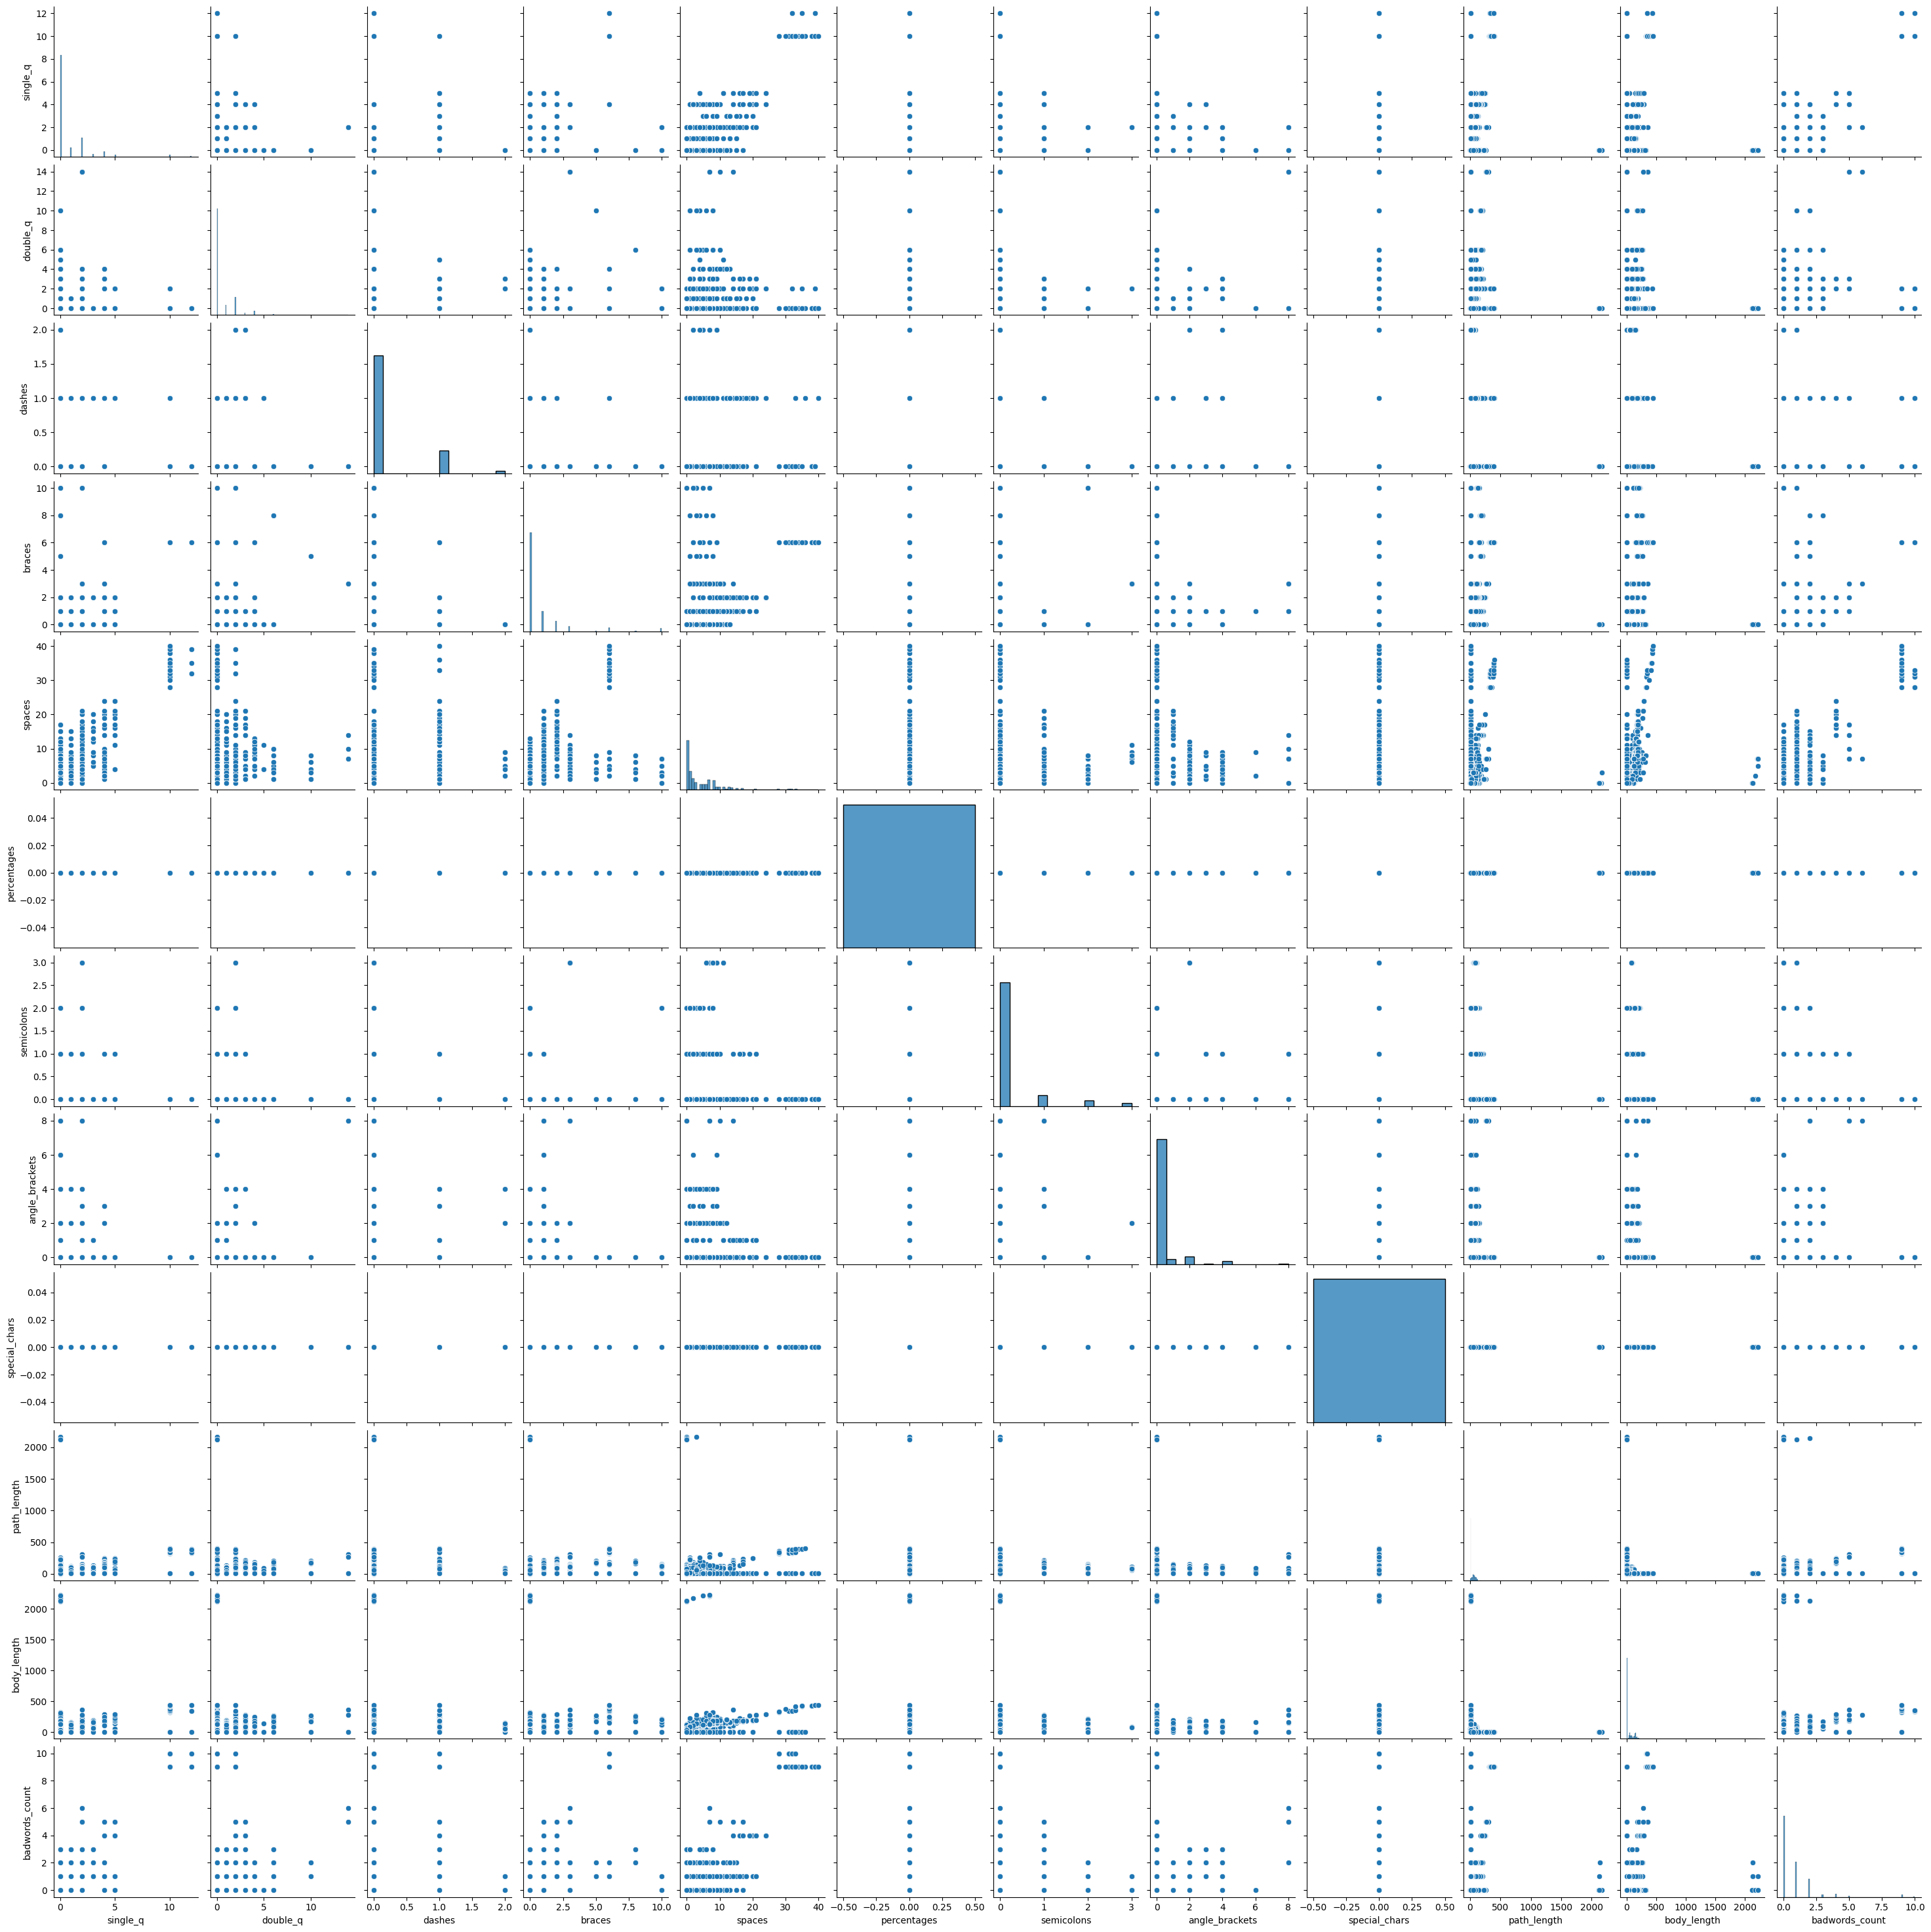

In [29]:
sns.pairplot(data_Bad)

На графике общих зависимостей как раз видим эту "решетку" по percentages и special_chars, в которой не отображается никакая зависимость все числа по нулям.

###Категориальные признаки
Имеется всего один категориальный признак это method.

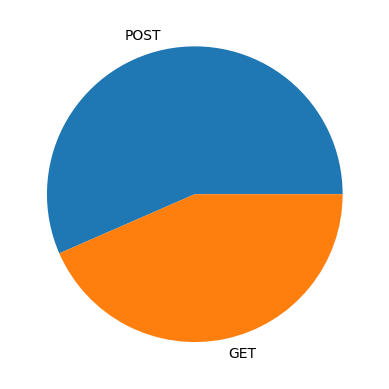

In [30]:
plt.pie(data_Bad['method'].value_counts().values,labels = list(data_Bad['method'].unique()))
pass

### Вывод
По данной диаграмме можем наблюдать, что примерно одинаково приходят запросы как на отправку так и на получение данных с сайта, но отправки данных происходит чуть больше.

Рассмотрим теперь гистограмму длины запроса

<Axes: xlabel='path_length', ylabel='Count'>

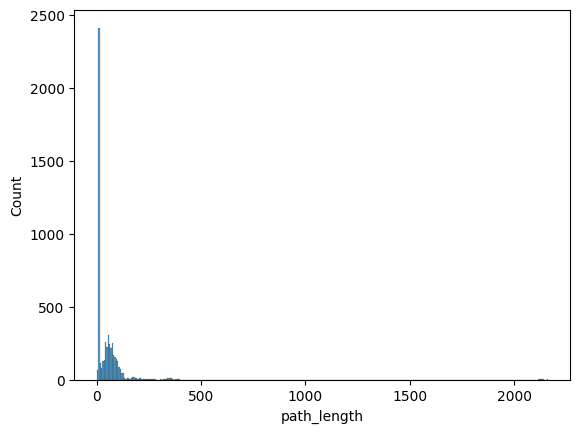

In [31]:
sns.histplot(data_Bad["path_length"])

Можем наблюдать что большинство запросов были длиной не более 200 символов, но также присутствуют запросы превышающие 2000 символов.

<Axes: xlabel='badwords_count', ylabel='Count'>

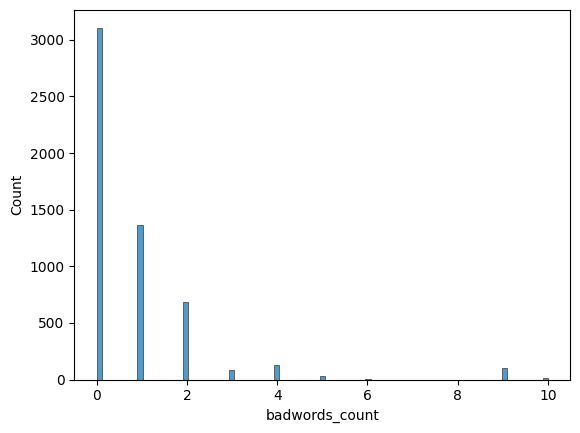

In [32]:
sns.histplot(data_Bad["badwords_count"])

###Выбросы

<Axes: >

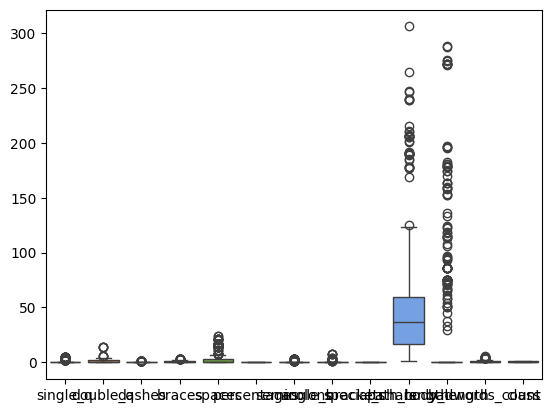

In [33]:
sns.boxplot(data_Good_and_Bad)

Можем наблюдать малые и очень большие в сравнении выбросы. Уберем данные выбросы.

<Axes: ylabel='path_length'>

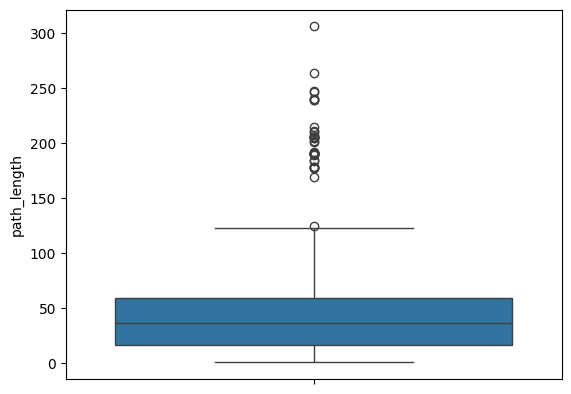

In [34]:
sns.boxplot(data_Good_and_Bad['path_length'])

<Axes: ylabel='path_length'>

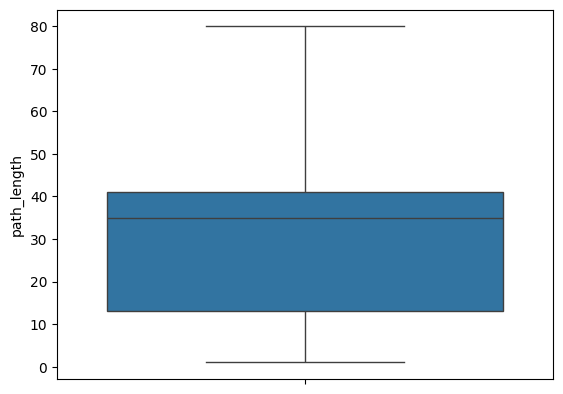

In [35]:
data_Good_and_Bad2 = data_Good_and_Bad[data_Good_and_Bad['path_length'] < data_Good_and_Bad['path_length'].quantile(0.85)]
sns.boxplot(data_Good_and_Bad2['path_length'])

<Axes: ylabel='body_length'>

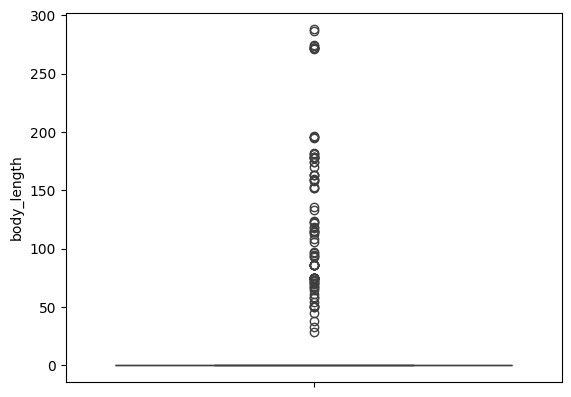

In [36]:
sns.boxplot(data_Good_and_Bad2["body_length"])

<Axes: ylabel='body_length'>

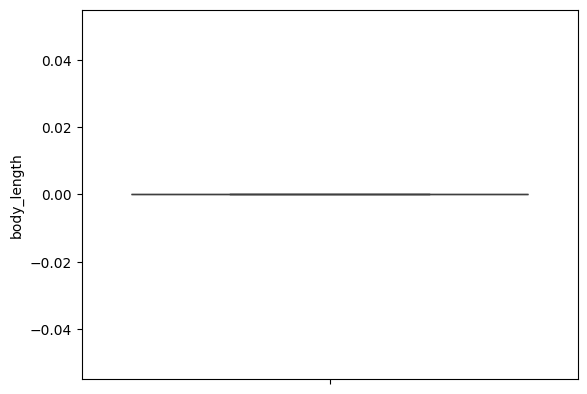

In [37]:
data_Good_and_Bad3 = data_Good_and_Bad2[data_Good_and_Bad2['body_length'] < data_Good_and_Bad2['body_length'].quantile(0.777)]
sns.boxplot(data_Good_and_Bad3['body_length'])

<Axes: >

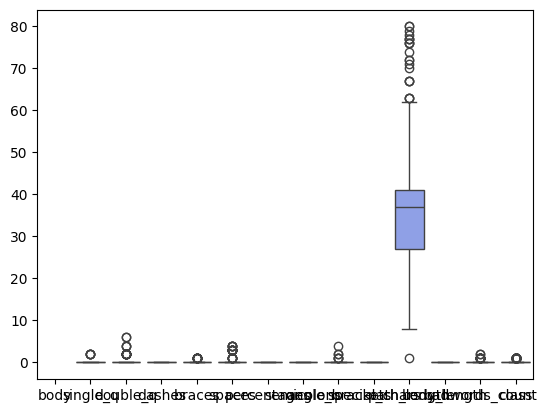

In [38]:
sns.boxplot(data_Good_and_Bad3)

<Axes: ylabel='path_length'>

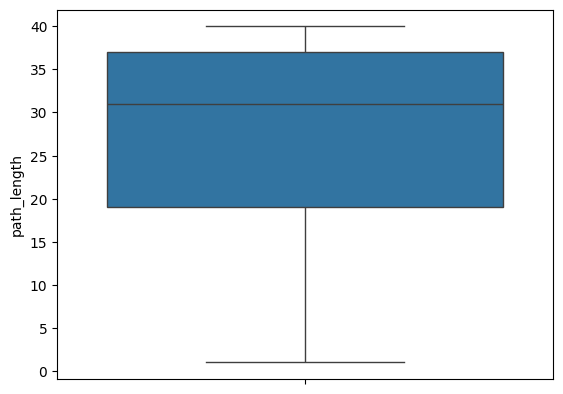

In [39]:
data_Good_and_Bad4 = data_Good_and_Bad3[data_Good_and_Bad3['path_length'] < data_Good_and_Bad3['path_length'].quantile(0.80)]
sns.boxplot(data_Good_and_Bad4['path_length'])

<Axes: >

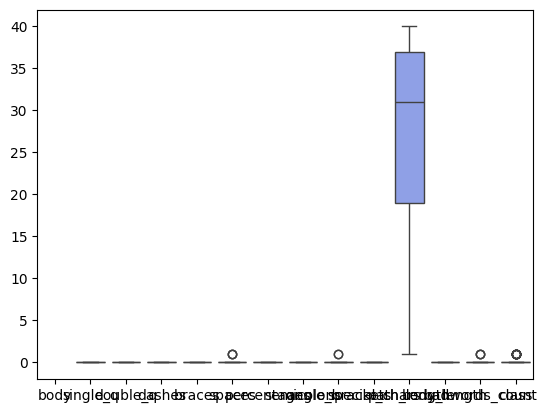

In [40]:
sns.boxplot(data_Good_and_Bad4)

Нам удалось избавиться от большинства выбросов. Давайте теперь посмотрим сколько строк в датасете осталось.

In [41]:
data_Good_and_Bad4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 2 to 520
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          247 non-null    object
 1   path            247 non-null    object
 2   body            0 non-null      object
 3   single_q        247 non-null    int64 
 4   double_q        247 non-null    int64 
 5   dashes          247 non-null    int64 
 6   braces          247 non-null    int64 
 7   spaces          247 non-null    int64 
 8   percentages     247 non-null    int64 
 9   semicolons      247 non-null    int64 
 10  angle_brackets  247 non-null    int64 
 11  special_chars   247 non-null    int64 
 12  path_length     247 non-null    int64 
 13  body_length     247 non-null    int64 
 14  badwords_count  247 non-null    int64 
 15  class           247 non-null    int64 
dtypes: int64(13), object(3)
memory usage: 32.8+ KB


Итого для удаления большей части выбросов потребовалось удалить примерно половину строк. Стоило ли оно того? Это может быть связано как и с особенностью датасета, так и с малым количеством строк в датасете. Рассмотрим например другой датасет.

<Axes: >

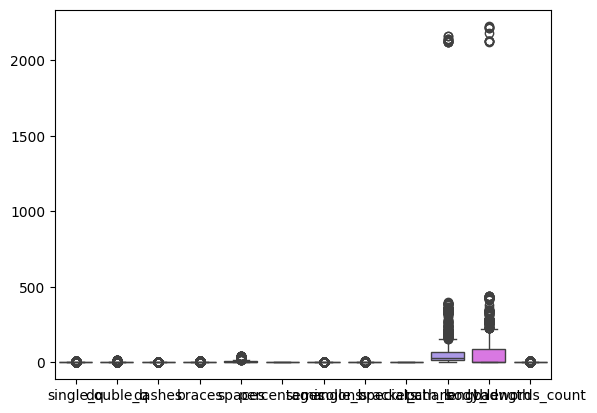

In [42]:
sns.boxplot(data_Bad)

Также попробуем избавиться от выбросов и посмотрим к чему нас это приведет.

<Axes: ylabel='path_length'>

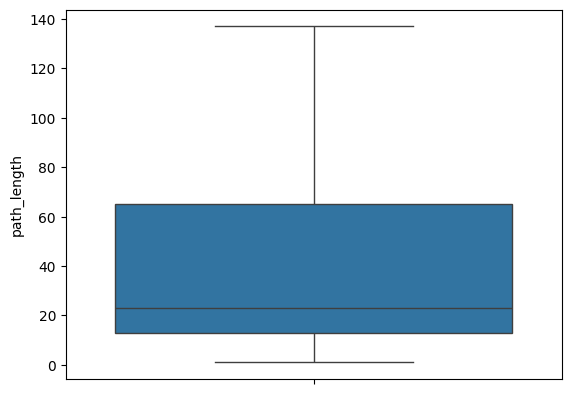

In [43]:
data_Bad2 = data_Bad[data_Bad['path_length'] < data_Bad['path_length'].quantile(0.956)]
sns.boxplot(data_Bad2['path_length'])

<Axes: ylabel='body_length'>

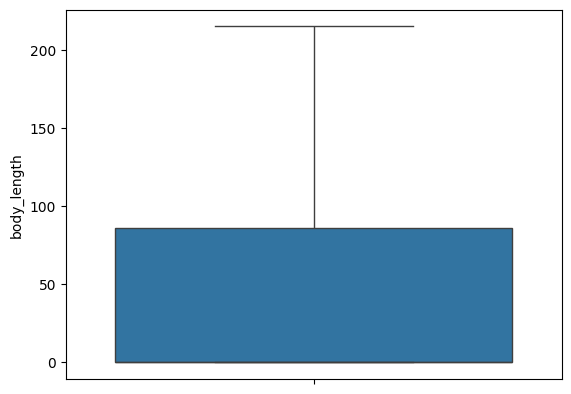

In [44]:
data_Bad3 = data_Bad2[data_Bad2['body_length'] < data_Bad2['body_length'].quantile(0.976)]
sns.boxplot(data_Bad3['body_length'])

<Axes: >

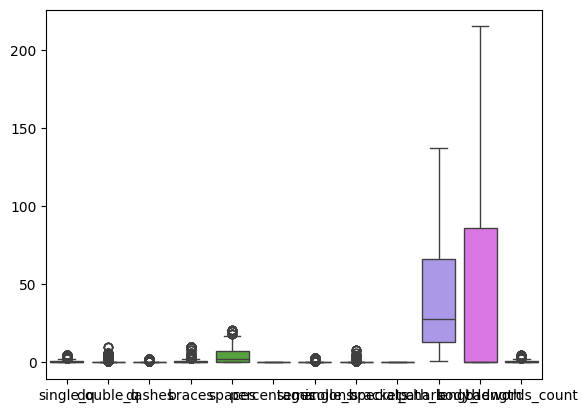

In [45]:
sns.boxplot(data_Bad3)

Нам удалось избавиться от больших выбросов, теперь посмотрим сколько строк сохранилось в датасете.

In [46]:
data_Bad3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5139 entries, 0 to 5509
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   method          5139 non-null   object
 1   path            5139 non-null   object
 2   body            2270 non-null   object
 3   single_q        5139 non-null   int64 
 4   double_q        5139 non-null   int64 
 5   dashes          5139 non-null   int64 
 6   braces          5139 non-null   int64 
 7   spaces          5139 non-null   int64 
 8   percentages     5139 non-null   int64 
 9   semicolons      5139 non-null   int64 
 10  angle_brackets  5139 non-null   int64 
 11  special_chars   5139 non-null   int64 
 12  path_length     5139 non-null   int64 
 13  body_length     5139 non-null   int64 
 14  badwords_count  5139 non-null   int64 
 15  class           5139 non-null   object
dtypes: int64(12), object(4)
memory usage: 682.5+ KB


In [47]:
print(f"Итого удалось сохранить примерно {data_Bad3.shape[0]/data_Bad.shape[0]*100}% строк!")

Итого удалось сохранить примерно 93.26678765880217% строк!


### Вывод
Удалось убрать выбросы и сохранить почти всю часть датасета.

# Модель

In [48]:
def ExtractFeatures(path, body):
    path = str(path)
    body = str(body)
    combined_raw = path + body
    raw_percentages = combined_raw.count("%")
    raw_spaces = combined_raw.count(" ")

    raw_percentages_count = raw_percentages if raw_percentages > 3 else 0
    raw_spaces_count = raw_spaces if raw_spaces > 3 else 0

    path_decoded = urllib.parse.unquote_plus(path)
    body_decoded = urllib.parse.unquote_plus(body)

    single_q = path_decoded.count("'") + body_decoded.count("'")
    double_q = path_decoded.count("\"") + body_decoded.count("\"")
    dashes = path_decoded.count("--") + body_decoded.count("--")
    braces = path_decoded.count("(") + body_decoded.count("(")
    spaces = path_decoded.count(" ") + body_decoded.count(" ")
    semicolons = path_decoded.count(";") + body_decoded.count(";")
    angle_brackets = path_decoded.count("<") + path_decoded.count(">") + body_decoded.count("<") + body_decoded.count(">")
    special_chars = sum(path_decoded.count(c) + body_decoded.count(c) for c in '$&|')

    badwords_count = sum(path_decoded.lower().count(word) + body_decoded.lower().count(word) for word in badwords)

    path_length = len(path_decoded)
    body_length = len(body_decoded)

    return [single_q, double_q, dashes, braces, spaces, raw_percentages_count, semicolons, angle_brackets, special_chars, path_length, body_length, badwords_count]

In [49]:
http = pd.read_csv('all_datas_f.csv')
missing_values = http.isna().sum()
print(missing_values)

# Check if the necessary columns exist
required_columns = ['path', 'body', 'class']
missing_columns = [col for col in required_columns if col not in http.columns]

if missing_columns:
    raise ValueError(f"Error: The dataset is missing the following columns: {', '.join(missing_columns)}")



badwords = ['sleep', 'uid', 'select', 'waitfor', 'delay', 'system', 'union', 'order by', 'group by', 'admin', 'drop', 'script']


http['features'] = http.apply(lambda row: ExtractFeatures(row['path'], row['body']), axis=1)

X = np.array(http['features'].tolist())
y = http['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)


method              0
path                0
body              418
single_q            0
double_q            0
dashes              0
braces              0
spaces              0
percentages         0
semicolons          0
angle_brackets      0
special_chars       0
path_length         0
body_length         0
badwords_count      0
class               0
dtype: int64


0.9238095238095239

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       1.00      0.86      0.92        57

    accuracy                           0.92       105
   macro avg       0.93      0.93      0.92       105
weighted avg       0.93      0.92      0.92       105



In [52]:
http['prediction'] = model.predict(X)

testing_data = pd.read_csv('Testing_data.csv')
if 'path' in testing_data.columns and 'body' in testing_data.columns:
        # Extract features from the testing data paths and bodies
    test_features = testing_data.apply(lambda row: ExtractFeatures(row['path'], row['body']), axis=1).tolist()

        # Convert test_features to a 2D numpy array
    test_features = np.array(test_features)

        # Predict whether each data point is good or bad
    predictions = model.predict(test_features)

        # Add the predictions to the testing data DataFrame
    testing_data['Prediction'] = predictions

        # Save the testing data with predictions to a new CSV file

    print("Predictions saved ")
else:
    print("Error: The testing data must contain 'path' and 'body' columns.")

Predictions saved 


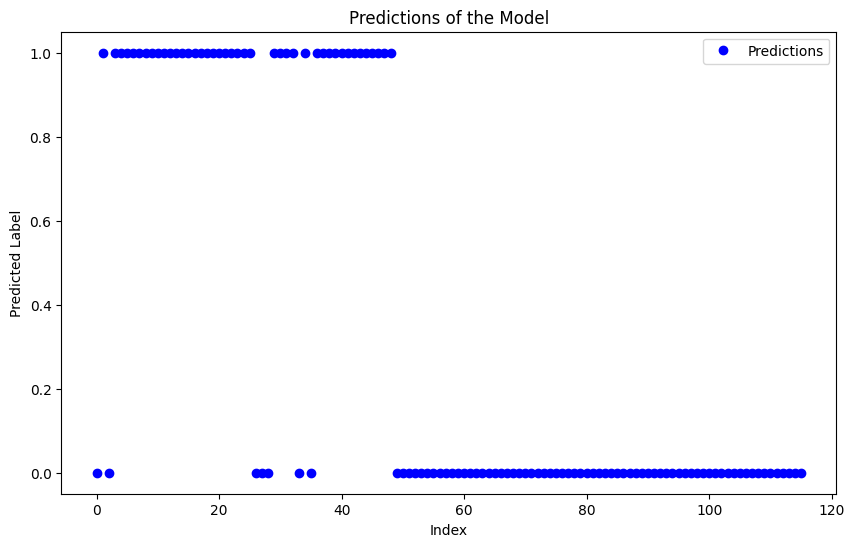

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(testing_data.index, predictions, marker='o', linestyle='', color='b', label='Predictions')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Predicted Label')
plt.title('Predictions of the Model')

# Show legend
plt.legend()

# Show plot
plt.show()